<a href="https://colab.research.google.com/github/amitverma7426/DataScience/blob/main/Taxi_Tip_Prediction_using_Scikit_Learn_and_Snap_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/yellow_tripdata_2019-06.csv

--2024-05-11 10:54:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/yellow_tripdata_2019-06.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364904448 (348M) [text/csv]
Saving to: ‘yellow_tripdata_2019-06.csv’

yellow_tripdata_201 100%[===================>] 348.00M  32.2MB/s    in 12s     

2024-05-11 10:55:02 (29.3 MB/s) - ‘yellow_tripdata_2019-06.csv’ saved [364904448/364904448]



In [2]:

# Snap ML is available on PyPI. To install it simply run the pip command below.
!pip install snapml==1.8.2

ERROR: Could not find a version that satisfies the requirement snapml==1.8.2 (from versions: 1.8.10, 1.8.11, 1.8.12, 1.9.4, 1.9.5, 1.9.6, 1.9.7, 1.10.0, 1.10.1, 1.10.2, 1.11.0, 1.11.1, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.2, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 1.15.6)
ERROR: No matching distribution found for snapml==1.8.2


In [34]:
!pip install snapml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 17.9 MB/s eta 0:00:00


In [3]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_squared_error
import time
import warnings
import gc, sys
warnings.filterwarnings('ignore')

In [4]:
# read the input data
raw_data = pd.read_csv('yellow_tripdata_2019-06.csv')
print("There are " + str(len(raw_data)) + " observations in the dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

# display first rows in the dataset
raw_data.head()

There are 3936004 observations in the dataset.
There are 18 variables in the dataset.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1.0,0.0,1.0,N,145.0,145.0,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1.0,0.0,1.0,N,262.0,263.0,2.0,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1.0,4.4,1.0,N,74.0,7.0,2.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0.0,0.8,1.0,N,145.0,145.0,2.0,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.7,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5


In [5]:
raw_data


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1.0,0.00,1.0,N,145.0,145.0,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1.0,0.00,1.0,N,262.0,263.0,2.0,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1.0,4.40,1.0,N,74.0,7.0,2.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0.0,0.80,1.0,N,145.0,145.0,2.0,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935999,2,2019-06-17 23:27:54,2019-06-17 23:37:37,1.0,3.36,1.0,N,75.0,161.0,1.0,11.5,0.5,0.5,0.00,0.0,0.3,15.30,2.5
3936000,2,2019-06-17 23:41:25,2019-06-17 23:48:50,1.0,1.64,1.0,N,161.0,234.0,1.0,8.0,0.5,0.5,4.00,0.0,0.3,15.80,2.5
3936001,2,2019-06-17 23:47:39,2019-06-17 23:54:02,5.0,2.00,1.0,N,211.0,186.0,2.0,7.5,0.5,0.5,0.00,0.0,0.3,11.30,2.5
3936002,2,2019-06-17 23:55:44,2019-06-18 00:06:50,5.0,3.06,1.0,N,164.0,236.0,2.0,11.5,0.5,0.5,0.00,0.0,0.3,15.30,2.5


In [6]:
# some trips report 0 tip. it is assumed that these tips were paid in cash.
# for this study we drop all these rows
raw_data = raw_data[raw_data['tip_amount'] > 0]
raw_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,14.30,2.5
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,12.30,2.5
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,31.5,3.0,0.5,7.05,0.0,0.3,42.35,2.5
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,2,2019-06-17 23:31:56,2019-06-17 23:39:55,5.0,1.82,1.0,N,230.0,143.0,1.0,8.0,0.5,0.5,2.95,0.0,0.3,14.75,2.5
3935996,2,2019-06-18 00:01:57,2019-06-18 00:09:48,1.0,1.36,1.0,N,79.0,68.0,1.0,7.5,0.5,0.5,1.08,0.0,0.3,12.38,2.5
3935997,2,2019-06-17 23:57:45,2019-06-18 00:08:13,1.0,3.00,1.0,N,144.0,100.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
3935998,2,2019-06-17 22:49:23,2019-06-17 23:00:40,1.0,2.73,1.0,N,238.0,116.0,1.0,11.5,0.5,0.5,1.50,0.0,0.3,14.30,0.0


In [7]:
# we also remove some outliers, namely those where the tip was larger than the fare cost
raw_data = raw_data[(raw_data['tip_amount'] <= raw_data['fare_amount'])]
raw_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,14.30,2.5
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,12.30,2.5
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,31.5,3.0,0.5,7.05,0.0,0.3,42.35,2.5
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,2,2019-06-17 23:31:56,2019-06-17 23:39:55,5.0,1.82,1.0,N,230.0,143.0,1.0,8.0,0.5,0.5,2.95,0.0,0.3,14.75,2.5
3935996,2,2019-06-18 00:01:57,2019-06-18 00:09:48,1.0,1.36,1.0,N,79.0,68.0,1.0,7.5,0.5,0.5,1.08,0.0,0.3,12.38,2.5
3935997,2,2019-06-17 23:57:45,2019-06-18 00:08:13,1.0,3.00,1.0,N,144.0,100.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
3935998,2,2019-06-17 22:49:23,2019-06-17 23:00:40,1.0,2.73,1.0,N,238.0,116.0,1.0,11.5,0.5,0.5,1.50,0.0,0.3,14.30,0.0


In [8]:
# we remove trips with very large fare cost
raw_data = raw_data[((raw_data['fare_amount'] >=2) & (raw_data['fare_amount'] < 200))]
raw_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,14.30,2.5
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,12.30,2.5
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,31.5,3.0,0.5,7.05,0.0,0.3,42.35,2.5
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,2,2019-06-17 23:31:56,2019-06-17 23:39:55,5.0,1.82,1.0,N,230.0,143.0,1.0,8.0,0.5,0.5,2.95,0.0,0.3,14.75,2.5
3935996,2,2019-06-18 00:01:57,2019-06-18 00:09:48,1.0,1.36,1.0,N,79.0,68.0,1.0,7.5,0.5,0.5,1.08,0.0,0.3,12.38,2.5
3935997,2,2019-06-17 23:57:45,2019-06-18 00:08:13,1.0,3.00,1.0,N,144.0,100.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
3935998,2,2019-06-17 22:49:23,2019-06-17 23:00:40,1.0,2.73,1.0,N,238.0,116.0,1.0,11.5,0.5,0.5,1.50,0.0,0.3,14.30,0.0


In [9]:
# we drop variables that include the target variable in it, namely the total_amount
clean_data = raw_data.drop(['total_amount'], axis=1)
clean_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,2.5
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,2.5
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,2.5
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,31.5,3.0,0.5,7.05,0.0,0.3,2.5
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,2,2019-06-17 23:31:56,2019-06-17 23:39:55,5.0,1.82,1.0,N,230.0,143.0,1.0,8.0,0.5,0.5,2.95,0.0,0.3,2.5
3935996,2,2019-06-18 00:01:57,2019-06-18 00:09:48,1.0,1.36,1.0,N,79.0,68.0,1.0,7.5,0.5,0.5,1.08,0.0,0.3,2.5
3935997,2,2019-06-17 23:57:45,2019-06-18 00:08:13,1.0,3.00,1.0,N,144.0,100.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,2.5
3935998,2,2019-06-17 22:49:23,2019-06-17 23:00:40,1.0,2.73,1.0,N,238.0,116.0,1.0,11.5,0.5,0.5,1.50,0.0,0.3,0.0


In [10]:
# release memory occupied by raw_data as we do not need it anymore
# we are dealing with a large dataset, thus we need to make sure we do not run out of memory
del raw_data
gc.collect()


40

There are 2712719 observations in the dataset.
There are 17 variables in the dataset.


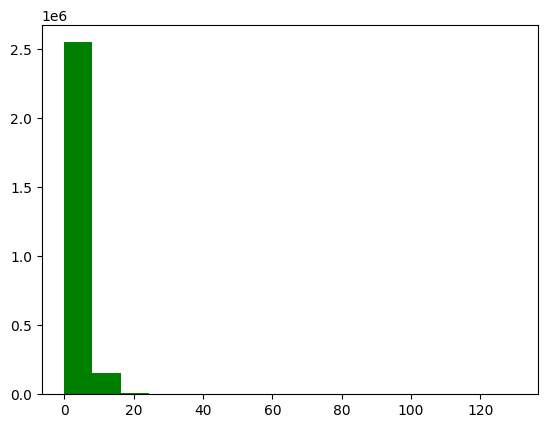

Minimum amount value is  0.01
Maximum amount value is  130.0
90% of the trips have a tip amount less or equal than  5.95


In [11]:
# print the number of trips left in the dataset
print("There are " + str(len(clean_data)) + " observations in the dataset.")
print("There are " + str(len(clean_data.columns)) + " variables in the dataset.")

plt.hist(clean_data.tip_amount.values, 16, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(clean_data.tip_amount.values))
print("Maximum amount value is ", np.max(clean_data.tip_amount.values))
print("90% of the trips have a tip amount less or equal than ", np.percentile(clean_data.tip_amount.values, 90))

In [12]:
# display first rows in the dataset
clean_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,2.5
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,2.5
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,2.5
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,31.5,3.0,0.5,7.05,0.0,0.3,2.5
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,2.5


In [13]:

# Convert 'tpep_dropoff_datetime' and 'tpep_pickup_datetime' columns to datetime objects
clean_data['tpep_dropoff_datetime'] = pd.to_datetime(clean_data['tpep_dropoff_datetime'])
clean_data['tpep_pickup_datetime'] = pd.to_datetime(clean_data['tpep_pickup_datetime'])


In [14]:
clean_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,2.5
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,2.5
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,2.5
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,31.5,3.0,0.5,7.05,0.0,0.3,2.5
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,2,2019-06-17 23:31:56,2019-06-17 23:39:55,5.0,1.82,1.0,N,230.0,143.0,1.0,8.0,0.5,0.5,2.95,0.0,0.3,2.5
3935996,2,2019-06-18 00:01:57,2019-06-18 00:09:48,1.0,1.36,1.0,N,79.0,68.0,1.0,7.5,0.5,0.5,1.08,0.0,0.3,2.5
3935997,2,2019-06-17 23:57:45,2019-06-18 00:08:13,1.0,3.00,1.0,N,144.0,100.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,2.5
3935998,2,2019-06-17 22:49:23,2019-06-17 23:00:40,1.0,2.73,1.0,N,238.0,116.0,1.0,11.5,0.5,0.5,1.50,0.0,0.3,0.0


In [15]:
# Extract pickup and dropoff hour
clean_data['pickup_hour'] = clean_data['tpep_pickup_datetime'].dt.hour
clean_data['dropoff_hour'] = clean_data['tpep_dropoff_datetime'].dt.hour

In [16]:
clean_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,2.5,0,0
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,2.5,0,0
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,2.5,0,1
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,31.5,3.0,0.5,7.05,0.0,0.3,2.5,0,1
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,2.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,2,2019-06-17 23:31:56,2019-06-17 23:39:55,5.0,1.82,1.0,N,230.0,143.0,1.0,8.0,0.5,0.5,2.95,0.0,0.3,2.5,23,23
3935996,2,2019-06-18 00:01:57,2019-06-18 00:09:48,1.0,1.36,1.0,N,79.0,68.0,1.0,7.5,0.5,0.5,1.08,0.0,0.3,2.5,0,0
3935997,2,2019-06-17 23:57:45,2019-06-18 00:08:13,1.0,3.00,1.0,N,144.0,100.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,2.5,23,0
3935998,2,2019-06-17 22:49:23,2019-06-17 23:00:40,1.0,2.73,1.0,N,238.0,116.0,1.0,11.5,0.5,0.5,1.50,0.0,0.3,0.0,22,23


In [17]:
# Extract pickup and dropoff day of the week (0 = Monday, 6 = Sunday)
clean_data['pickup_day'] = clean_data['tpep_pickup_datetime'].dt.weekday
clean_data['dropoff_day'] = clean_data['tpep_dropoff_datetime'].dt.weekday

In [18]:
clean_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour,pickup_day,dropoff_day
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,...,3.0,0.5,2.65,0.0,0.3,2.5,0,0,5,5
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,...,3.0,0.5,1.00,0.0,0.3,2.5,0,0,5,5
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,...,3.0,0.5,1.00,0.0,0.3,2.5,0,1,5,5
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,...,3.0,0.5,7.05,0.0,0.3,2.5,0,1,5,5
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,...,0.5,0.5,2.96,0.0,0.3,2.5,0,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,2,2019-06-17 23:31:56,2019-06-17 23:39:55,5.0,1.82,1.0,N,230.0,143.0,1.0,...,0.5,0.5,2.95,0.0,0.3,2.5,23,23,0,0
3935996,2,2019-06-18 00:01:57,2019-06-18 00:09:48,1.0,1.36,1.0,N,79.0,68.0,1.0,...,0.5,0.5,1.08,0.0,0.3,2.5,0,0,1,1
3935997,2,2019-06-17 23:57:45,2019-06-18 00:08:13,1.0,3.00,1.0,N,144.0,100.0,1.0,...,0.5,0.5,2.96,0.0,0.3,2.5,23,0,0,1
3935998,2,2019-06-17 22:49:23,2019-06-17 23:00:40,1.0,2.73,1.0,N,238.0,116.0,1.0,...,0.5,0.5,1.50,0.0,0.3,0.0,22,23,0,0


In [19]:
# Calculate trip time in seconds
clean_data['trip_time'] = (clean_data['tpep_dropoff_datetime'] - clean_data['tpep_pickup_datetime']).dt.total_seconds()

In [20]:
clean_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour,pickup_day,dropoff_day,trip_time
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,...,0.5,2.65,0.0,0.3,2.5,0,0,5,5,737.0
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,...,0.5,1.00,0.0,0.3,2.5,0,0,5,5,652.0
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,...,0.5,1.00,0.0,0.3,2.5,0,1,5,5,488.0
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,...,0.5,7.05,0.0,0.3,2.5,0,1,5,5,2041.0
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,...,0.5,2.96,0.0,0.3,2.5,0,0,5,5,858.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,2,2019-06-17 23:31:56,2019-06-17 23:39:55,5.0,1.82,1.0,N,230.0,143.0,1.0,...,0.5,2.95,0.0,0.3,2.5,23,23,0,0,479.0
3935996,2,2019-06-18 00:01:57,2019-06-18 00:09:48,1.0,1.36,1.0,N,79.0,68.0,1.0,...,0.5,1.08,0.0,0.3,2.5,0,0,1,1,471.0
3935997,2,2019-06-17 23:57:45,2019-06-18 00:08:13,1.0,3.00,1.0,N,144.0,100.0,1.0,...,0.5,2.96,0.0,0.3,2.5,23,0,0,1,628.0
3935998,2,2019-06-17 22:49:23,2019-06-17 23:00:40,1.0,2.73,1.0,N,238.0,116.0,1.0,...,0.5,1.50,0.0,0.3,0.0,22,23,0,0,677.0


In [21]:
# Ideally use the full dataset for this exercise.
# However, if you run into out-of-memory issues due to the data size, reduce it.
# For instance, in this example, we use only the first 200,000 samples.
first_n_rows = 200000
clean_data = clean_data.head(first_n_rows)

In [22]:
clean_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour,pickup_day,dropoff_day,trip_time
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,...,0.5,2.65,0.0,0.3,2.5,0,0,5,5,737.0
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,...,0.5,1.00,0.0,0.3,2.5,0,0,5,5,652.0
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,...,0.5,1.00,0.0,0.3,2.5,0,1,5,5,488.0
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,...,0.5,7.05,0.0,0.3,2.5,0,1,5,5,2041.0
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,...,0.5,2.96,0.0,0.3,2.5,0,0,5,5,858.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305279,1,2019-06-02 10:12:58,2019-06-02 10:31:20,1.0,4.40,1.0,N,79.0,48.0,1.0,...,0.5,3.86,0.0,0.3,2.5,10,10,6,6,1102.0
305282,1,2019-06-02 10:19:53,2019-06-02 10:37:11,1.0,2.80,1.0,N,141.0,48.0,1.0,...,0.5,3.35,0.0,0.3,2.5,10,10,6,6,1038.0
305283,1,2019-06-02 10:40:37,2019-06-02 10:45:44,3.0,1.00,1.0,N,230.0,142.0,1.0,...,0.5,2.00,0.0,0.3,2.5,10,10,6,6,307.0
305284,1,2019-06-02 10:51:22,2019-06-02 11:21:20,1.0,7.30,1.0,N,239.0,79.0,1.0,...,0.5,6.15,0.0,0.3,2.5,10,11,6,6,1798.0


In [23]:
# drop the pickup and dropoff datetimes
clean_data = clean_data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

In [24]:
clean_data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour,pickup_day,dropoff_day,trip_time
4,1,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,2.5,0,0,5,5,737.0
5,1,2.0,1.60,1.0,N,79.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,2.5,0,0,5,5,652.0
7,1,2.0,1.20,1.0,N,79.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,2.5,0,1,5,5,488.0
9,1,1.0,8.60,1.0,N,186.0,243.0,1.0,31.5,3.0,0.5,7.05,0.0,0.3,2.5,0,1,5,5,2041.0
10,2,1.0,1.74,1.0,N,107.0,148.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,2.5,0,0,5,5,858.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305279,1,1.0,4.40,1.0,N,79.0,48.0,1.0,16.0,2.5,0.5,3.86,0.0,0.3,2.5,10,10,6,6,1102.0
305282,1,1.0,2.80,1.0,N,141.0,48.0,1.0,13.5,2.5,0.5,3.35,0.0,0.3,2.5,10,10,6,6,1038.0
305283,1,3.0,1.00,1.0,N,230.0,142.0,1.0,6.0,2.5,0.5,2.00,0.0,0.3,2.5,10,10,6,6,307.0
305284,1,1.0,7.30,1.0,N,239.0,79.0,1.0,27.5,2.5,0.5,6.15,0.0,0.3,2.5,10,11,6,6,1798.0


In [25]:
# some features are categorical, we need to encode them
# to encode them we use one-hot encoding from the Pandas package
get_dummy_col = ["VendorID","RatecodeID","store_and_fwd_flag","PULocationID", "DOLocationID","payment_type", "pickup_hour", "dropoff_hour", "pickup_day", "dropoff_day"]
proc_data = pd.get_dummies(clean_data, columns = get_dummy_col)

# release memory occupied by clean_data as we do not need it anymore
# we are dealing with a large dataset, thus we need to make sure we do not run out of memory
del clean_data
gc.collect()

4160

In [26]:
# extract the labels from the dataframe
y = proc_data[['tip_amount']].values.astype('float32')
y

array([[ 2.65],
       [ 1.  ],
       [ 1.  ],
       ...,
       [ 2.  ],
       [ 6.15],
       [10.44]], dtype=float32)

In [27]:
# drop the target variable from the feature matri
proc_data = proc_data.drop(['tip_amount'], axis=1)


In [28]:

# get the feature matrix used for training
X = proc_data.values

# normalize the feature matrix
X = normalize(X, axis=1, norm='l1', copy=False)

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (200000, 517) y.shape= (200000, 1)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (140000, 517) Y_train.shape= (140000, 1)
X_test.shape= (60000, 517) Y_test.shape= (60000, 1)


In [31]:
# import the Decision Tree Regression Model from scikit-learn
from sklearn.tree import DecisionTreeRegressor

# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_dt = DecisionTreeRegressor(max_depth=8, random_state=35)

# train a Decision Tree Regressor using scikit-learn
t0 = time.time()
sklearn_dt.fit(X_train, y_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  7.79398


In [35]:
# import the Decision Tree Regressor Model from Snap ML
from snapml import DecisionTreeRegressor

# in contrast to sklearn's Decision Tree, Snap ML offers multi-threaded CPU/GPU training
# to use the GPU, one needs to set the use_gpu parameter to True
# snapml_dt = DecisionTreeRegressor(max_depth=4, random_state=45, use_gpu=True)

# to set the number of CPU threads used at training time, one needs to set the n_jobs parameter
# for reproducible output across multiple function calls, set random_state to a given integer value
snapml_dt = DecisionTreeRegressor(max_depth=8, random_state=45, n_jobs=4)

# train a Decision Tree Regressor model using Snap ML
t0 = time.time()
snapml_dt.fit(X_train, y_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  8.83867


In [36]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Regressor] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

# run inference using the sklearn model
sklearn_pred = sklearn_dt.predict(X_test)

# evaluate mean squared error on the test dataset
sklearn_mse = mean_squared_error(y_test, sklearn_pred)
print('[Scikit-Learn] MSE score : {0:.3f}'.format(sklearn_mse))

# run inference using the Snap ML model
snapml_pred = snapml_dt.predict(X_test)

# evaluate mean squared error on the test dataset
snapml_mse = mean_squared_error(y_test, snapml_pred)
print('[Snap ML] MSE score : {0:.3f}'.format(snapml_mse))

[Decision Tree Regressor] Snap ML vs. Scikit-Learn speedup : 0.88x 
[Scikit-Learn] MSE score : 1.636
[Snap ML] MSE score : 1.655
